# Ford GoBike
#### by Abdullah Elsayed

## Investigation Overview

> In our investigation we focused our goal to find the factors that affect the number and duration of the rides. We will try to present the interesting results that we found in this presentations. Also, we will state our opinion on how to improve the service to target more people.

## Dataset Overview

> This dataset has information about trips for Ford FoBike service. All the trips have taken place in February 2019. There are many features in the dataset but we focused our investigation on the attibures stated below.

In [40]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [41]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('gobike.csv')

def formatter(pct):
    return '{:0.2f}'.format(pct)

base_color = base_color = sb.color_palette()[0]

df = df.drop(['start_station_id',
              'start_station_latitude',
              'start_station_longitude',
              'end_station_id',
              'end_station_latitude',
              'end_station_longitude',
              'bike_id',
              'bike_share_for_all_trip'], axis=1);

df.dropna(inplace=True)

df['start_time'] = pd.to_datetime(df['start_time']) # Convert from string to Datetime
df['end_time'] = pd.to_datetime(df['end_time']) # Convert from string to Datetime
df['member_birth_year'] = df['member_birth_year'].astype(int) # Convert from float to int

df['duration'] = (df['duration_sec'] / 60).astype(int) # Convert second to minutes
df = df.drop(['duration_sec'], axis=1) # Delete duration_sec column

df = df.query('member_birth_year >= 1929 & member_birth_year <= 2001') # Selecting rows with values between 1939 and 2001
df['age'] = 2019 - df['member_birth_year'] # Create age column
df = df.drop(['member_birth_year'], axis=1) # Delete member_birth_year column

# Define conditions
age_conditions = [
    (df['age'] < 20),
    (df['age'] >= 20) & (df['age'] < 25),
    (df['age'] >= 25) & (df['age'] < 30),
    (df['age'] >= 30) & (df['age'] < 40),
    (df['age'] >= 40) & (df['age'] < 50),
    (df['age'] >= 50) & (df['age'] < 60),
    (df['age'] >= 60) & (df['age'] <= 70),
    (df['age'] > 70)
]

# Define values
age_values = [
    'Below 20',
    '20-25',
    '25-30',
    '30-40',
    '40-50',
    '50-60',
    '60-70',
    'Above 70'
]

# Create the age group column
df['age_group'] = np.select(age_conditions, age_values)

## Big gap in genders

> The below graph, consist of two graphs about gender. The first, state the percentage of rides made by the different genders in our dataset. We can clearly see that males have the biggest share of trips. This might indicate that marketing campainges do not target females. Also, it might indicate that females did not find the service good for them. We can solve this through survays to see what we can afford for them to make the service better. The second, state the duration of trips made by each gender. It's clear that males take shorter trips than other groups.

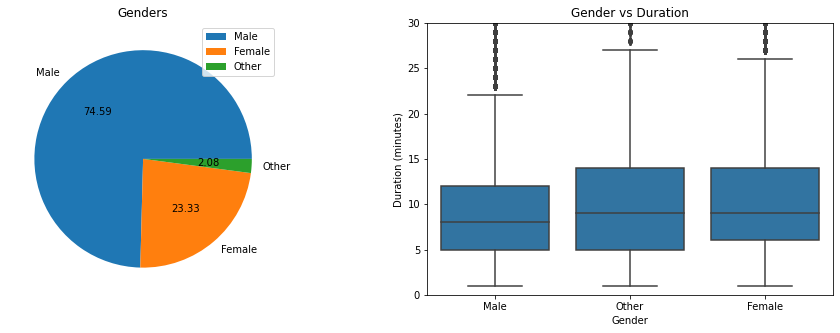

In [42]:
plt.figure(figsize = (16, 5))
           
plt.subplot(1,2,1)
gender_percent = df['member_gender'].value_counts(normalize=True) * 100 # Get percentage of each user type in the dataset
labels = gender_percent.index
plt.pie(x=gender_percent, labels=labels, autopct=lambda pct: formatter(pct))
plt.title('Genders')
plt.legend();

plt.subplot(1,2,2)
sb.boxplot(data=df, x='member_gender', y='duration', color=base_color)
plt.ylim([0, 30]) # Limit y-axis value
plt.title('Gender vs Duration')
plt.xlabel('Gender')
plt.ylabel('Duration (minutes)');

## GoBike is most likely used by workers

> The below graph has three bar graphs about the frequency of rides by day, hour, and age group. People tend to make trips more on working days. Also, we can see that people make trips in the morning and evening. This indicate that people user the service to go to work and go back from work. Futhermore, from our investigation on age, we can see that the service is populer amoung people with age from 20 to 50. This age is the age of working people. Therefore, from all these finding we can conclude that the service is very popular amoung working people and these findings might indicate that most people use it only go to work or go back from work to home. We can solve this issue by trying to target other groups in marketing campainges.


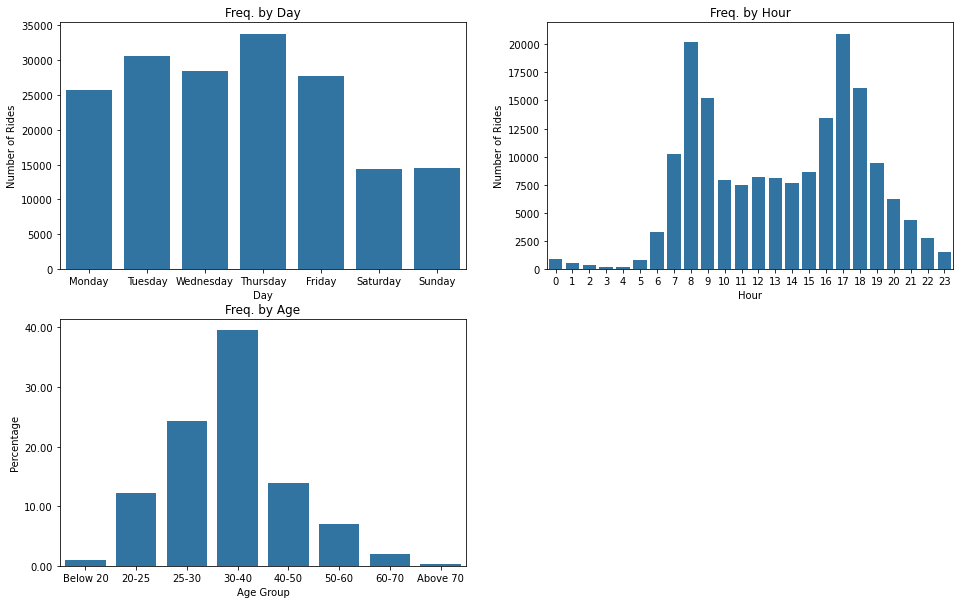

In [43]:
plt.figure(figsize = (16, 10))

plt.subplot(2,2,1)
df['trip_day'] = df['start_time'].dt.day_name() # Create trip day column
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data=df, x='trip_day', color=base_color, order=order)
plt.title('Freq. by Day')
plt.xlabel('Day')
plt.ylabel('Number of Rides')

plt.subplot(2,2,2)
df['trip_hour'] = df['start_time'].dt.hour # Create trip hour column
order = np.arange(0, 24)
sb.countplot(data=df, x='trip_hour', color=base_color, order=order)
plt.title('Freq. by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')

plt.subplot(2,2,3)
age_group_count = df['age_group'].value_counts()
max_age_group_count = age_group_count[0]
n_rows = df.shape[0]
max_prop = max_age_group_count / n_rows
tick_props = np.arange(0, max_prop + 0.1, 0.1)
tick_names = ['{:0.2f}'.format(v*100) for v in tick_props]
sb.countplot(data=df, x='age_group', order=age_values, color=base_color)
plt.yticks(tick_props * n_rows, tick_names)
plt.title('Freq. by Age')
plt.xlabel('Age Group')
plt.ylabel('Percentage');

## Age and trip duration

> The below, graph shows the duration of trip quartile distribution of each age group. Our exploration on age did not indicate that there is any relarionship between age and trip duration. We found that people below 20 and people with age from 60 to 70 take longer trips than other age groups. All other groups take trips with almost the same duration.

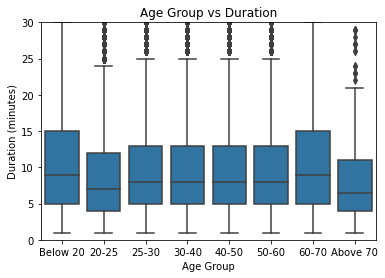

In [44]:
sb.boxplot(data=df, x='age_group', y='duration', color=base_color, order=age_values)
plt.ylim([0, 30]) # Limit y-axis value
plt.title('Age Group vs Duration')
plt.xlabel('Age Group')
plt.ylabel('Duration (minutes)');